In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng()

# 1a) Graph density

In [2]:
def f(x,a,b):
    return a*b*x**(a-1)*(1-x**a)**(b-1)

In [3]:
t = np.linspace(0,1,1000)

/var/folders/nx/66n_n3m52673_p592jgpkjjm0000gn/T/ipykernel_39396/505042697.py:2: RuntimeWarning: divide by zero encountered in power
  return a*b*x**(a-1)*(1-x**a)**(b-1)
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_in

<Axes: >

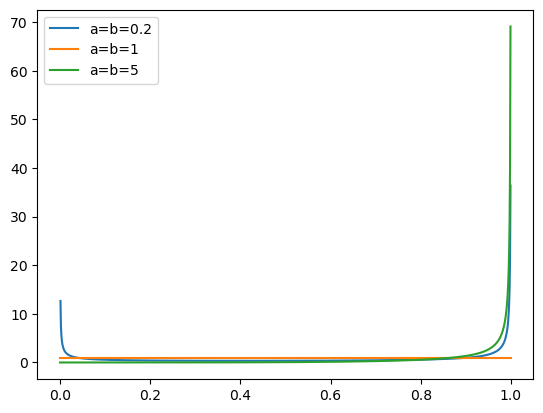

In [4]:
fig,ax = plt.subplots()

sns.lineplot(x=t,y=f(t,0.2,0.2),label="a=b=0.2",ax=ax)
sns.lineplot(x=t,y=f(t,1,1),label="a=b=1",ax=ax)
sns.lineplot(x=t,y=f(t,5,0.2),label="a=b=5",ax=ax)

# 1bi) Inversion Sampling

\begin{align}
    F(x,\alpha,\beta) &= \int_0^xf(x,\alpha,\beta)dx \\
    &= [-(1-x^\alpha)^\beta]_0^x \\
    &=(1-(1-x^\alpha)^\beta) \\

    F^{-1}(y) &= (1-(1-y)^{\frac{1}{\beta}})^{\frac{1}{\alpha}}
\end{align}



In [5]:
def F_inverse(u,a,b):
    return (1-(1-u)**(1/b))**(1/a)

# 1bii) Generating samples


/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

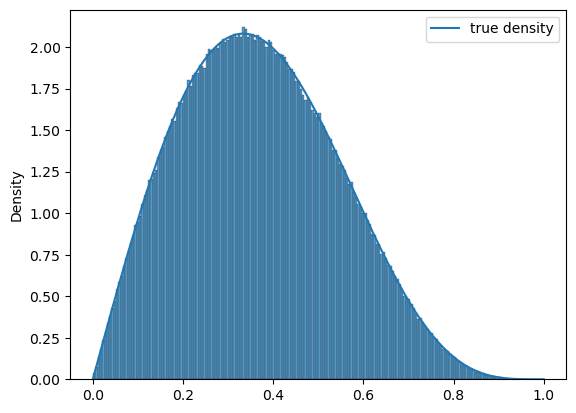

In [6]:
u = rng.random(1000000)
a = 2
b = 5
sample = F_inverse(u,a,b)
fig,ax = plt.subplots()
sns.lineplot(x=t,y=f(t,a,b),label="true density",ax=ax)
sns.histplot(sample,ax=ax,stat='density',label='inverse simulation')

# 1ci) Rejection Sampling:

For what values of $\alpha, \beta$ is $f$ bounded?

If $\alpha >1, \beta > 1,  f(x,\alpha, \beta) < \alpha \beta$

We can use a uniform distribution 

/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


9.969294572716034


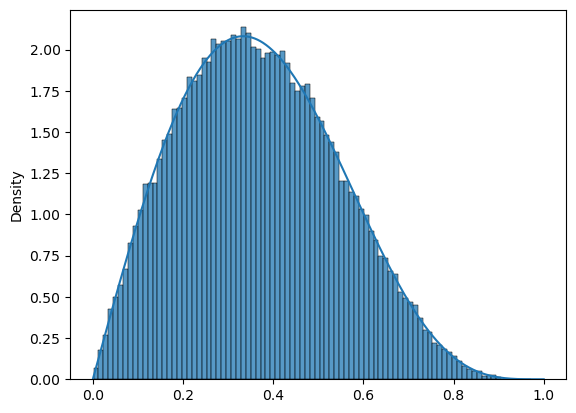

In [7]:
sample_size = 1000000

a=2
b=5

u = rng.random(sample_size)
x = rng.random(sample_size)
sample = x[u*(a*b) <= f(x,a,b)]

fig,ax = plt.subplots()
sns.lineplot(x=t,y=f(t,a,b),ax=ax)
sns.histplot(sample,stat='density',ax=ax)

print(sample_size/sample.shape[0])

## Diagnostic: Kolmogorov-Smirnov test:

In [8]:
from scipy.stats import kstest

In [9]:
def F(x,a,b):
    return 1-(1-x**a)**b

In [10]:
kstest(sample,F,(2,5))

KstestResult(statistic=0.0020498144717785993, pvalue=0.7924294770893612, statistic_location=0.3461995924191853, statistic_sign=1)

# 1ei) max of two densities

note that the max is bounded by the sum

In [11]:

gamma = 5
sample_size = 1000000
u = rng.random(sample_size)
u2 = rng.random(sample_size)

f1 = F_inverse(u2,2,1/gamma)
f2 = F_inverse(u2,2,gamma)

x = np.where(u>0.5,f1,f2)

u3 = rng.random(sample_size)


sample2 = x[
    np.max([f(x,2,1/gamma),f(x,2,gamma)],axis=0)
    /(np.sum([f(x,2,1/gamma),f(x,2,gamma)],axis=0))
    >= u3
]


/var/folders/nx/66n_n3m52673_p592jgpkjjm0000gn/T/ipykernel_39396/505042697.py:2: RuntimeWarning: divide by zero encountered in power
  return a*b*x**(a-1)*(1-x**a)**(b-1)
/var/folders/nx/66n_n3m52673_p592jgpkjjm0000gn/T/ipykernel_39396/2810794871.py:15: RuntimeWarning: invalid value encountered in divide
  np.max([f(x,2,1/gamma),f(x,2,gamma)],axis=0)


Alternative: sample from both and then filter:

In [12]:
gamma = 5
sample_size = 1000000

u = rng.random(sample_size)
u1 = rng.random(sample_size)

f1 = F_inverse(u1,2,1/gamma)
f2 = F_inverse(u1,2,gamma)

mask1 = u > 0.5

x = np.where(mask1,f1,f2)

mask2 = np.where(mask1,f(x,2,1/gamma)>f(x,2,gamma),f(x,2,1/gamma)<f(x,2,gamma))

sample = x[mask2]

/var/folders/nx/66n_n3m52673_p592jgpkjjm0000gn/T/ipykernel_39396/505042697.py:2: RuntimeWarning: divide by zero encountered in power
  return a*b*x**(a-1)*(1-x**a)**(b-1)


/var/folders/nx/66n_n3m52673_p592jgpkjjm0000gn/T/ipykernel_39396/505042697.py:2: RuntimeWarning: divide by zero encountered in power
  return a*b*x**(a-1)*(1-x**a)**(b-1)
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_in

(0.0, 5.0)

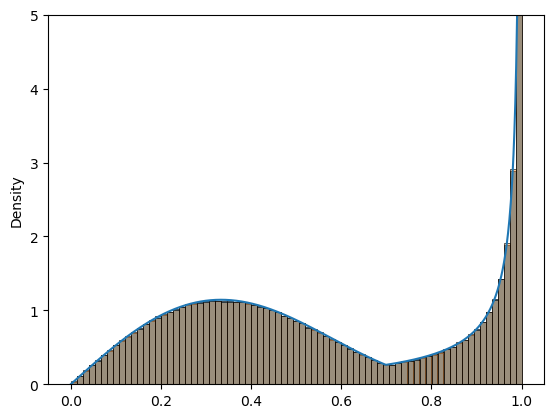

In [35]:
def pdf_func(t,a,b):
    return np.max([f(t,a,b),f(t,a,1/b)],axis=0)

x = np.linspace(0,1,1000)
y = pdf_func(x,2,gamma)/1.82

fig,ax = plt.subplots()
sns.lineplot(x=x,y=y,ax=ax)
sns.histplot(sample,stat='density',ax=ax)
sns.histplot(sample2,stat='density',ax=ax,alpha=0.4)
ax.set_ylim(0,5)

## Diagnostic

In [27]:


def approx_CDF(x,pdf_func,steps,a,b):
    t = np.linspace(0,1,steps,endpoint=False)
    pdf = pdf_func(t,a,b)
    cdf = np.cumsum(pdf)*1/steps
    cdf = cdf/cdf[-1]

    idx = np.floor(x*steps).astype(int)
    idx = np.where(idx==steps,idx-1,idx)

    return cdf[idx]

In [34]:
t = np.linspace(0,1,100000000,endpoint=False)
pdf = pdf_func(t,a,b)
cdf = np.cumsum(pdf)*1/100000000
cdf[-1]

1.813897716365497

/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

<Axes: ylabel='Proportion'>

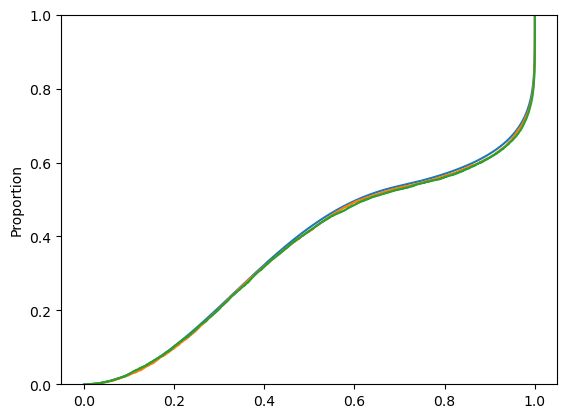

In [35]:
sns.lineplot(x=t,y=cdf)
sns.ecdfplot(sample2[:10000])
sns.ecdfplot(sample[:10000])

In [41]:
kstest(sample,approx_CDF,(pdf_func,1000000000,2,gamma))